In [ ]:
# -*- coding: utf-8 -*-
# Indentation: Jupyter Notebook

'''
Reinforcement learning with Thompson sampling
'''

__version__ = 1.0
__author__ = "Sourav Raj"
__author_email__ = "souravraj.iitbbs@gmail.com"


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
dataset = pd.read_csv("../../data/Ads_CTR_Optimisation.csv")
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [6]:
N=10000
d=10
ads_selected = []
no_of_rewards_1 = [0] * d
no_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0,d):
        random_beta = random.betavariate(no_of_rewards_1[i]+1, no_of_rewards_0[i]+1 )
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward ==1:
        no_of_rewards_1[ad] = no_of_rewards_1[ad] + 1
    else:
        no_of_rewards_0[ad] = no_of_rewards_0[ad] + 1
    total_reward = total_reward + reward
    

In [7]:
total_reward

2604

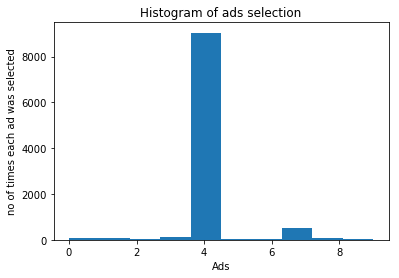

In [8]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('no of times each ad was selected')
plt.show()